# Guía 5 - Ejercicio 6.2
Para la realización de este ejercicio se cargaron las imágenes del texto rotado y sin rotar. Luego, para la detección del ángulo que se debe rotar se convirtió cada imagen a su espectro de Fourier, posteriormente se realizó la detección de bordes con canny (para la obtención de parámetros se fue probando distintos valores a través de trackbars para encontrar la línea principal de la imagen) y con la imagen de bordes se utilizó la función de detección de líneas de la transformada de Hough probabilística para obtener las líneas detectadas de manera espacial, donde a través de estas se calculó el ángulo promedio de la imagen y, finalmente con este ángulo se rotó la imagen.

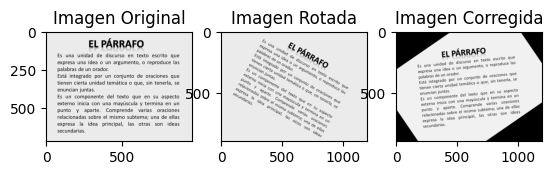

Ángulo promedio original: -90.0 grados
Ángulo promedio rotada: -55.56101069119639 grados
Ángulo de rotación necesario: 34.43898930880361 grados


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import imutils
from scipy.fft import fft2, ifft2, fftshift, ifftshift

def tranformada_fourier_imagen(imagen):
    fft_imagen = fft2(imagen)
    fft_imagen_shifted = fftshift(fft_imagen)
    magnitude_spectrum = 20 * np.log(np.abs(fft_imagen_shifted) + 1)
    return magnitude_spectrum

def tranformada_inversa_fourier(imagen_fft_shifteada):
    return np.abs(np.fft.ifft2(np.fft.ifftshift(imagen_fft_shifteada)))

def tranformada_fourier(imagen):
    fft_imagen = fft2(imagen)
    fft_imagen_shifted = fftshift(fft_imagen)
    return fft_imagen_shifted

# Función para calcular el ángulo de una línea
def calcular_angulo_linea(linea):
    x1, y1, x2, y2 = linea[0]
    angulo = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
    return angulo

# Leer imágenes
imagen_rotada = cv.imread("Imagenes/parrafo1.jpg", cv.IMREAD_GRAYSCALE)
imagen_original = cv.imread("Imagenes/parrafo0.jpg", cv.IMREAD_GRAYSCALE)

# Transformada de Fourier y normalización
imagen_rotada_fft_magnitud = tranformada_fourier_imagen(imagen_rotada)
imagen_original_fft_magnitud = tranformada_fourier_imagen(imagen_original)
imagen_original_fft_magnitud = cv.normalize(imagen_original_fft_magnitud, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
imagen_rotada_fft_magnitud = cv.normalize(imagen_rotada_fft_magnitud, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

# Detección de bordes con Canny
bordes_original = cv.Canny(imagen_original_fft_magnitud, 66, 174)
bordes_rotada = cv.Canny(imagen_rotada_fft_magnitud, 60, 185)

# Detección de líneas con HoughLinesP
lineas_originales = cv.HoughLinesP(bordes_original, 1, np.pi / 180, 12, minLineLength=134, maxLineGap=5)
lineas_rotada = cv.HoughLinesP(bordes_rotada, 1, np.pi*2 / 180, 1, minLineLength=28, maxLineGap=11)

# Calcular ángulos de las líneas
angulos_originales = [calcular_angulo_linea(linea) for linea in lineas_originales]
angulos_rotada = [calcular_angulo_linea(linea) for linea in lineas_rotada]

# Promediar los ángulos para obtener el ángulo dominante
angulo_promedio_original = np.median(angulos_originales)
angulo_promedio_rotada = np.median(angulos_rotada)


# Calcular el ángulo de rotación necesario para alinear las imágenes
angulo_rotacion = angulo_promedio_rotada - angulo_promedio_original

# Rotar la imagen rotada para corregir la alineación
imagen_rotada_corregida = imutils.rotate(imagen_rotada, angulo_rotacion)

# Mostrar imágenes
plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(imagen_original, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Imagen Rotada')
plt.imshow(imagen_rotada, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Imagen Corregida')
plt.imshow(imagen_rotada_corregida, cmap='gray')

plt.show()

print(f"Ángulo promedio original: {angulo_promedio_original} grados")
print(f"Ángulo promedio rotada: {angulo_promedio_rotada} grados")
print(f"Ángulo de rotación necesario: {angulo_rotacion} grados")
